# Social Network Analysis

This notebook will show you how to analyze networks and visualize their structure.  In particular, it can analyze  networks where nodes are people and a link represents an organizations where two people belong.  YIBO: is this right?

The notebook uses the numpy library to manage data and the matplotlib library to visualize the results.  YIBO please add pointers to both.

YIBO: please add references and pointers: The notebook uses the XYZ library and the PQR library...

The following cell contains some predefined functions to process networks. Please make sure you have run this cell before you run other cells in this notebook.

In [1]:
import networkx as nx
import itertools
import matplotlib.pyplot as plt

def loadOrganization(filename):
    with open(filename) as f:
        data=f.readlines()
        features=data[0].rstrip().split(',')[1:]
        values=[entry.rstrip().split(',')[1:] for entry in data[1:]]
        return features,values

def Organization_Visualization():
    plt.clf()
    filename=raw_input('Please Enter the File Name:')
    features,values=loadOrganization(filename)
    g=nx.Graph()
    weightedNodes={}
    for value in values:
        lst=[]
        for index,node in enumerate(value):
            if node=='1':
                lst.append(features[index])
        for i in itertools.combinations(lst,2):
            weightedNodes[i]=weightedNodes.get(i,0) + 1
    for nodes,weights in weightedNodes.items():
        #print nodes,weights
        g.add_edge(*nodes,weight=weights*0.4)
    n=nx.number_of_nodes(g)
    pos=nx.spring_layout(g,k=n**(-1./3))  
    edges = g.edges()
    weights = [g[u][v]['weight'] for u,v in edges]
    nx.draw(g,pos,with_labels = True,node_color="#E69F00",width=weights,font_size=8,font_color='#0F0C82',edge_color="#A9A9A9")
    filename=filename[:-4]+'_organization.png'
    plt.savefig(filename,dpi=300)
    plt.show()   

def loadPeople(filename):
    Organization_People={}
    with open(filename) as f:
        data=f.readlines()
        features=data[0].rstrip().split(',')[1:]
        values=[entry.rstrip().split(',') for entry in data[1:]]
        for i in range(len(features)):
            persons=[]
            for value in values:
                if value[i+1]=='1':
                    persons.append(value[0])
            Organization_People[features[i]]=persons
        return Organization_People

def People_Visualization():
    plt.clf()
    filename=raw_input('Please Enter the File Name:')
    Organization_People=loadPeople(filename)
    g=nx.Graph()
    for organization in Organization_People.keys():
        for i in itertools.combinations(Organization_People[organization],2):
            g.add_edge(*i)
    n=nx.number_of_nodes(g)
    pos=nx.spring_layout(g,k=n**(-1./3))    
    nx.draw(g,pos=pos,with_labels = True,width=0.05,linewidths=0.2,node_color="#E69F00",node_size=4,font_size=4,font_color='#0F0C82',edge_color="#A9A9A9")
    filename=filename[:-4]+'_people.png'
    plt.savefig(filename,dpi=300) 
    plt.show()

## Organization Visualization##
The following cell visualizes the organization network between your data entries. When you are prompted to input the data, please make sure your dataset follows the same format of "Revolution.txt" and "HighSchoolClubs.txt".

YIBO: This does not explain how the data is formatted.  Overall, this notebook should have a similar structure to the Parallel Coordinates notebook.

Please Enter the File Name:Revolution.txt


/Users/gil/anaconda2/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/gil/anaconda2/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/gil/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/gil/anaconda2/lib/python2.7/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprec

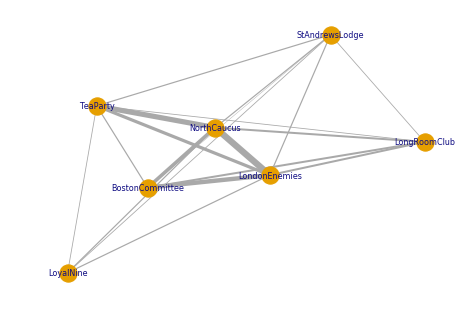

In [2]:
Organization_Visualization()

## People Visualization##
The following cell visualizes the people network between your data entries. When you are prompted to input the data, please make sure your dataset follows the same format of "Revolution.txt" and "HighSchoolClubs.txt".

YIBO: can the visualization be made bigger?

Please Enter the File Name:Revolution.txt


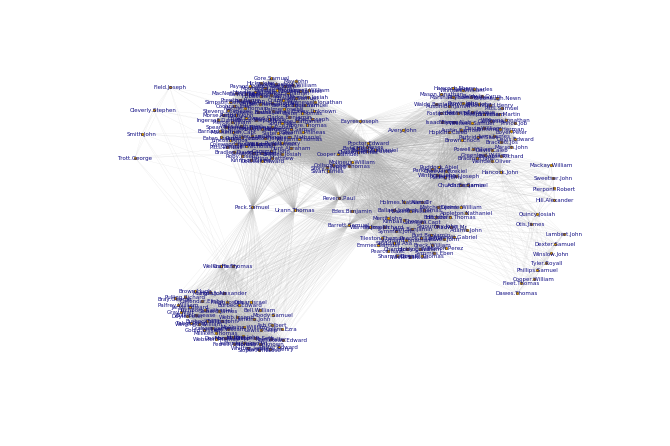

In [257]:
People_Visualization()